In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.tokenize import word_tokenize
from transformers import AutoModel, AutoTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity



In [5]:
# read genereted llM CSV file
data_gpt4o_mini = pd.read_csv('gpt4mini.csv')
data_gpt4o= pd.read_csv('gpt4o.csv')

texts = data_gpt4o_mini['Text']
labels = data_gpt4o_mini['label']

texts_o = data_gpt4o['Text']
labels_o = data_gpt4o['label']

llm_data = pd.concat([data_gpt4o_mini, data_gpt4o])

texts_all = llm_data['Text']
labels_all = llm_data['label']

<h2>Comprehensive Data Exploration and Quality Assessment</h2>

In [6]:
print(data_gpt4o_mini.head())
print(data_gpt4o_mini.info())

   ID                                               Text      label
0   0          شرب الشاي مع النعناع، في وقت الاسترخاء.    Levantine
1   1             أمك شلونها، تحسنت صحتها بعد العملية؟        Iraqi
2   2           ذهبت لزيارة الأخت، وأحببت الجلسة معها.         Gulf
3   3  سمعت إنه فيه فرقة جديدة عم تتكون، بدها جماهير ...  Levantine
4   4                 خطر لي، هل فعلا نقدر نحب جميعًا؟        Iraqi
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      6500 non-null   int64 
 1   Text    6500 non-null   object
 2   label   6500 non-null   object
dtypes: int64(1), object(2)
memory usage: 152.5+ KB
None


In [7]:
print(data_gpt4o.head())
data_gpt4o.info()

   ID                                               Text     label
0   0                      الأزهار منسقة بطريقة رائعة.        Gulf
1   1  الناس كيهتموا بالبرامج ديرماجلون وماكتشفناها ل...  Maghrebi
2   2              الأغنية دي بتفكرني بذكريات المدارس.    Egyptian
3   3  ودوني ودوني لديرتي، أنا أفتقدك يا ديرتي الحبيب...      Gulf
4   4        حاسبتنا تشتغل بسرعه اذا نظفت الذاكرة مالها.     Iraqi
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      6000 non-null   int64 
 1   Text    6000 non-null   object
 2   label   6000 non-null   object
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


In [8]:
print(llm_data.head())
print(llm_data.info())

   ID                                               Text      label
0   0          شرب الشاي مع النعناع، في وقت الاسترخاء.    Levantine
1   1             أمك شلونها، تحسنت صحتها بعد العملية؟        Iraqi
2   2           ذهبت لزيارة الأخت، وأحببت الجلسة معها.         Gulf
3   3  سمعت إنه فيه فرقة جديدة عم تتكون، بدها جماهير ...  Levantine
4   4                 خطر لي، هل فعلا نقدر نحب جميعًا؟        Iraqi
<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      12500 non-null  int64 
 1   Text    12500 non-null  object
 2   label   12500 non-null  object
dtypes: int64(1), object(2)
memory usage: 390.6+ KB
None


In [9]:
print("Total LLM Genereted Data: {}".format(len(llm_data)))

Total LLM Genereted Data: 12500


In [10]:
# 1. Missing Values Analysis
print("1. Missing Values Analysis:")
missing_values = llm_data.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print(missing_values[missing_values > 0])


1. Missing Values Analysis:
No missing values found.



Label Distribution Analysis:


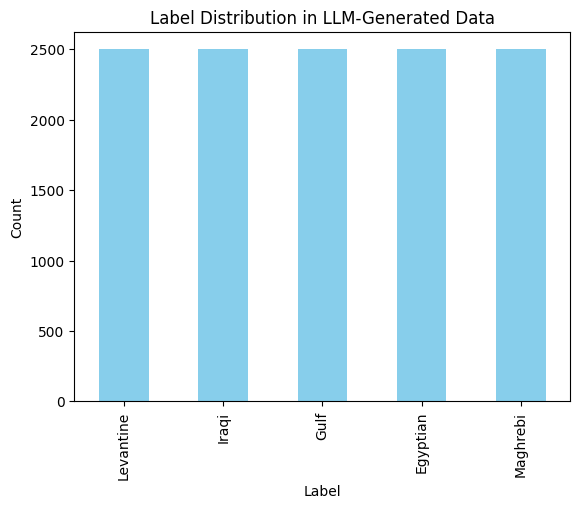

Label Distribution (%):
label
Levantine    20.0
Iraqi        20.0
Gulf         20.0
Egyptian     20.0
Maghrebi     20.0
Name: count, dtype: float64


In [17]:
print("\nLabel Distribution Analysis:")
label_counts = labels_all.value_counts()
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Distribution in LLM-Generated Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
print("Label Distribution (%):")
print((label_counts / len(labels_all)) * 100)

In [12]:
# Check for data types and unique values per feature
data=llm_data
print(data.dtypes)

# Describe statistics for a quick overview
print(data.describe())


ID        int64
Text     object
label    object
dtype: object
                ID
count  12500.00000
mean    3129.50000
std     1812.92476
min        0.00000
25%     1562.00000
50%     3124.50000
75%     4687.00000
max     6499.00000


In [13]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Removing duplicate rows
data = data.drop_duplicates()


Number of duplicate rows: 0


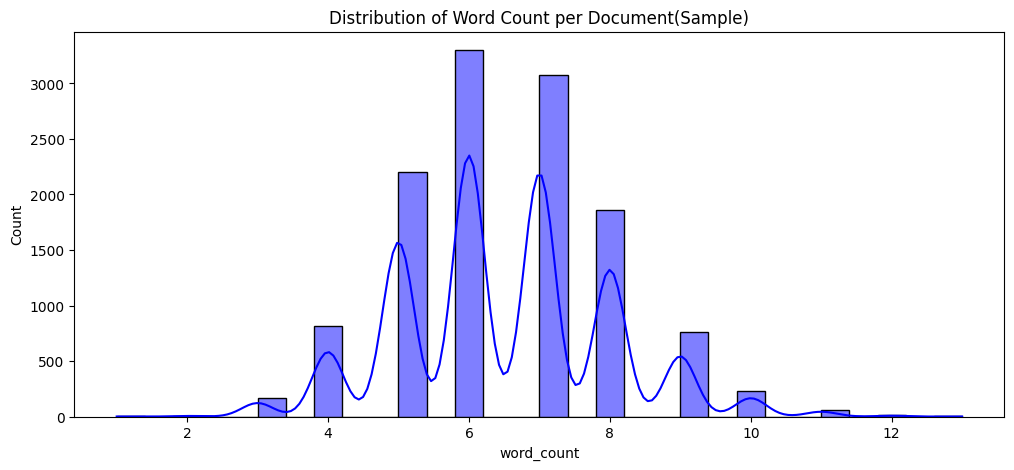

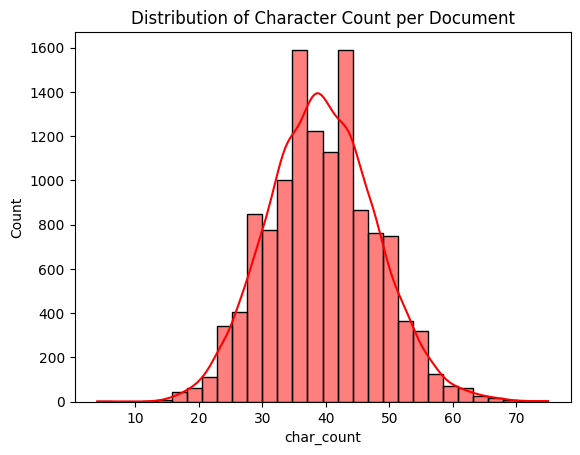

In [14]:
# Example: Checking average word length and character count per document
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['Text'].apply(lambda x: len(str(x)))

# Plotting distribution of word count and character count
plt.figure(figsize=(12, 5))
sns.histplot(data['word_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Count per Document(Sample)')
plt.show()

sns.histplot(data['char_count'], bins=30, kde=True, color='red')
plt.title('Distribution of Character Count per Document')
plt.show()


#This distribution suggests a dataset with short text entries that have somewhat consistent length

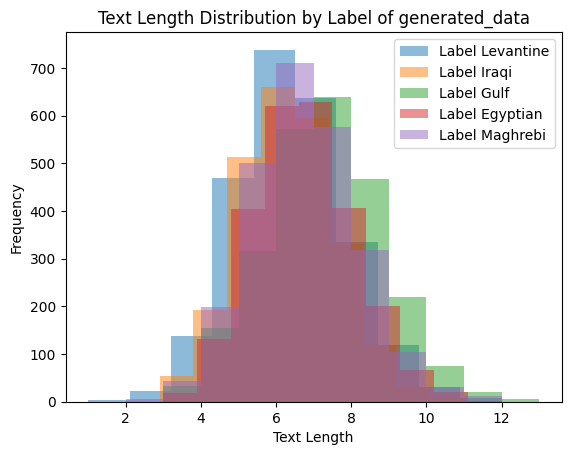

In [29]:
import matplotlib.pyplot as plt

# Calculate text lengths
data['text_length'] = data['Text'].apply(lambda x: len(x.split()))

# Plot histograms for each label's text length distribution
for label in data['label'].unique():
    subset = data[data['label'] == label]
    plt.hist(subset['text_length'], bins=10, alpha=0.5, label=f"Label {label}")

plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.legend()
plt.title("Text Length Distribution by Label of generated_data")
plt.show()
#The figure shows that text length distributions for all labels are very similar, with significant overlap. 
# This indicates that text length alone is unlikely to be a distinguishing feature for these labels.

In [15]:
# Tokenizing texts to count unique words
words = llm_data['Text'].str.split()
all_words = list(itertools.chain(*words))
unique_words = Counter(all_words)

print(f"Total number of words: {len(all_words)}")
print(f"Number of unique words: {len(unique_words)}")
print(f"Most common words: {unique_words.most_common(10)}")


Total number of words: 80992
Number of unique words: 27582
Most common words: [('في', 2071), ('من', 990), ('على', 935), ('مع', 685), ('عن', 569), ('كل', 557), ('ما', 502), ('اللي', 403), ('لازم', 320), ('كان', 292)]


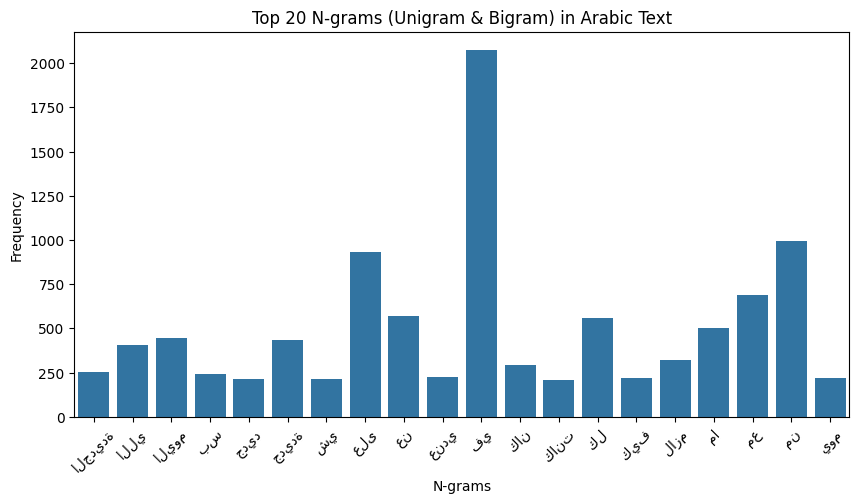

In [16]:
# Unigram and Bigram Analysis
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=20, analyzer='word')
X = vectorizer.fit_transform(llm_data['Text'])
ngram_counts = np.asarray(X.sum(axis=0)).flatten()
ngram_labels = vectorizer.get_feature_names_out()

# Plotting the most frequent n-grams
plt.figure(figsize=(10, 5))
sns.barplot(x=ngram_labels, y=ngram_counts)
plt.xticks(rotation=45)
plt.title('Top 20 N-grams (Unigram & Bigram) in Arabic Text')
plt.xlabel('N-grams')
plt.ylabel('Frequency')
plt.show()
#This helps to see if the LLM-generated data includes natural and common phrases in Arabic, which would indicate high-quality generation


,Egyptian,Gulf,Iraqi,Levantine,Maghrebi
عشرات,1.0,0.0,0.0,0.0,0.0
الناس,64.0,21.0,26.0,30.0,53.0
بيتجمعوا,1.0,0.0,0.0,0.0,0.0
في,845.0,677.0,169.0,214.0,166.0
ساحة,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...
الكماليات,0.0,0.0,0.0,0.0,1.0
كتقطع,0.0,0.0,0.0,0.0,1.0
بالطلاب,0.0,0.0,0.0,0.0,1.0
نتسالا,0.0,0.0,0.0,0.0,1.0


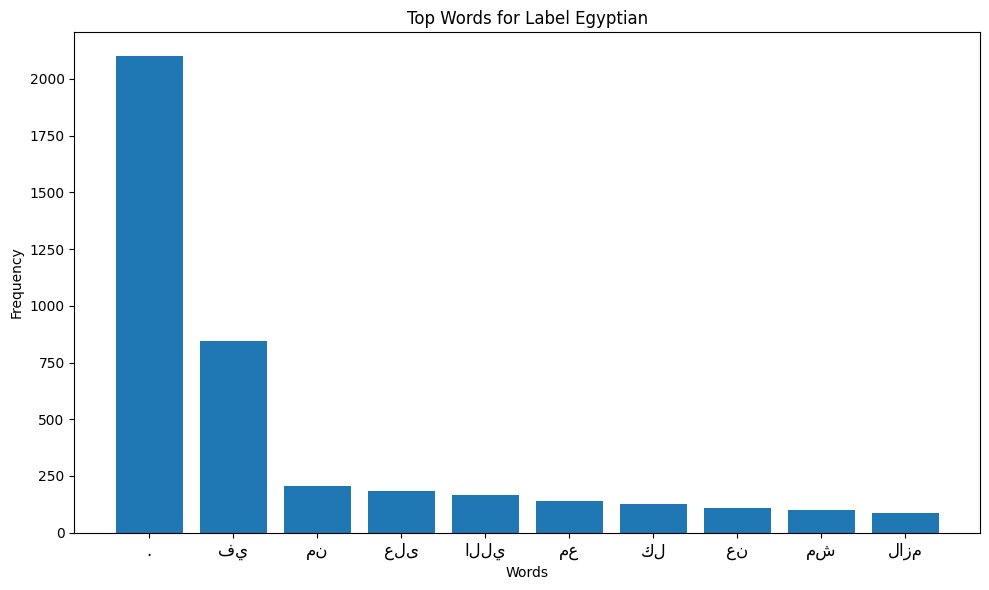

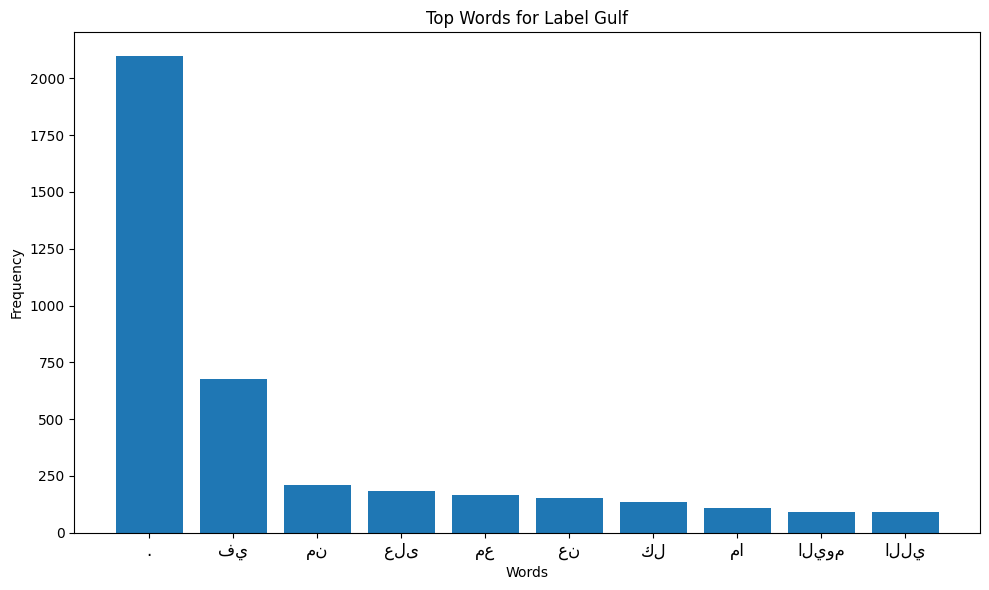

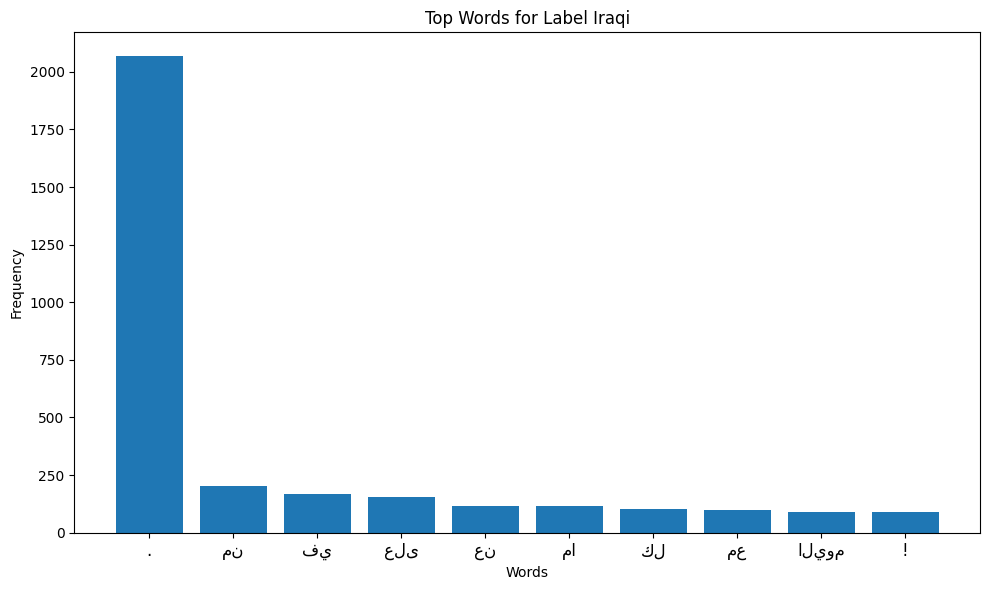

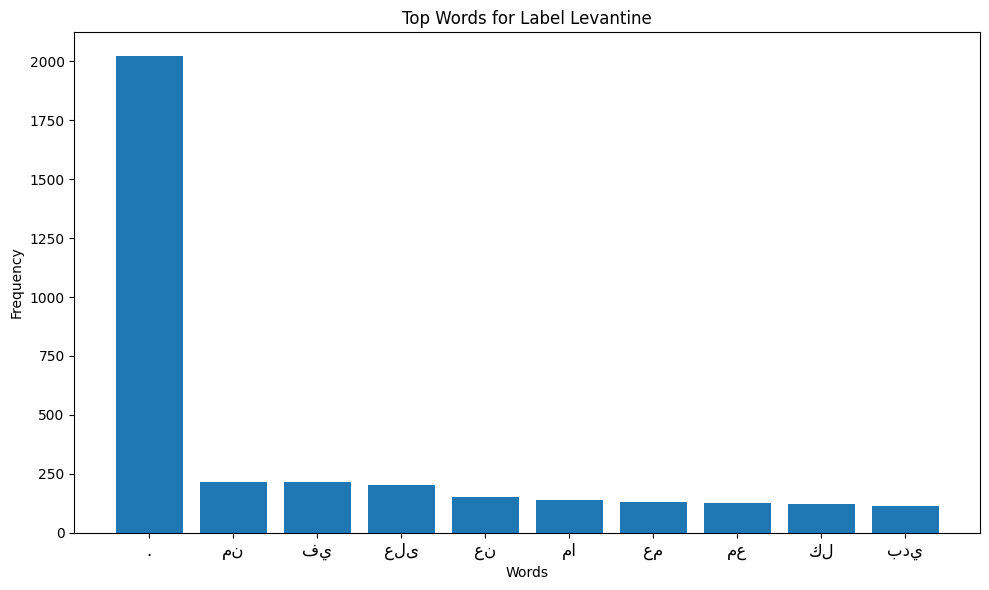

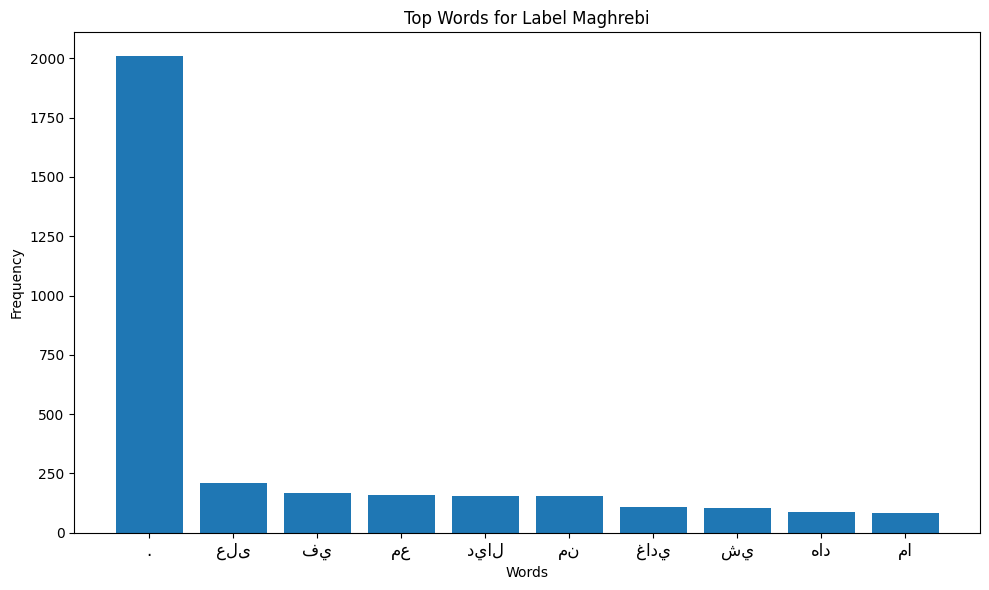

,10,16,2023,350,3ندي,4k,ai,carpool,da,diy,...,چيتلك,چيف,ڊيوم,ڤويس,کلها,گلب,ہو,یضحك,یقصدني,아름
Egyptian,0.000000,0.000000,0.000000,0.000000,0.000000,0.001943,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gulf,0.002298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Iraqi,0.000000,0.000000,0.003469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003469,...,0.003469,0.003469,0.003469,0.003469,0.003469,0.003469,0.003469,0.003469,0.000000,0.000000
Levantine,0.000000,0.002998,0.000000,0.000000,0.000000,0.000000,0.002998,0.002998,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002998,0.002998
Maghrebi,0.000000,0.000000,0.000000,0.002622,0.002622,0.000000,0.000000,0.000000,0.002622,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


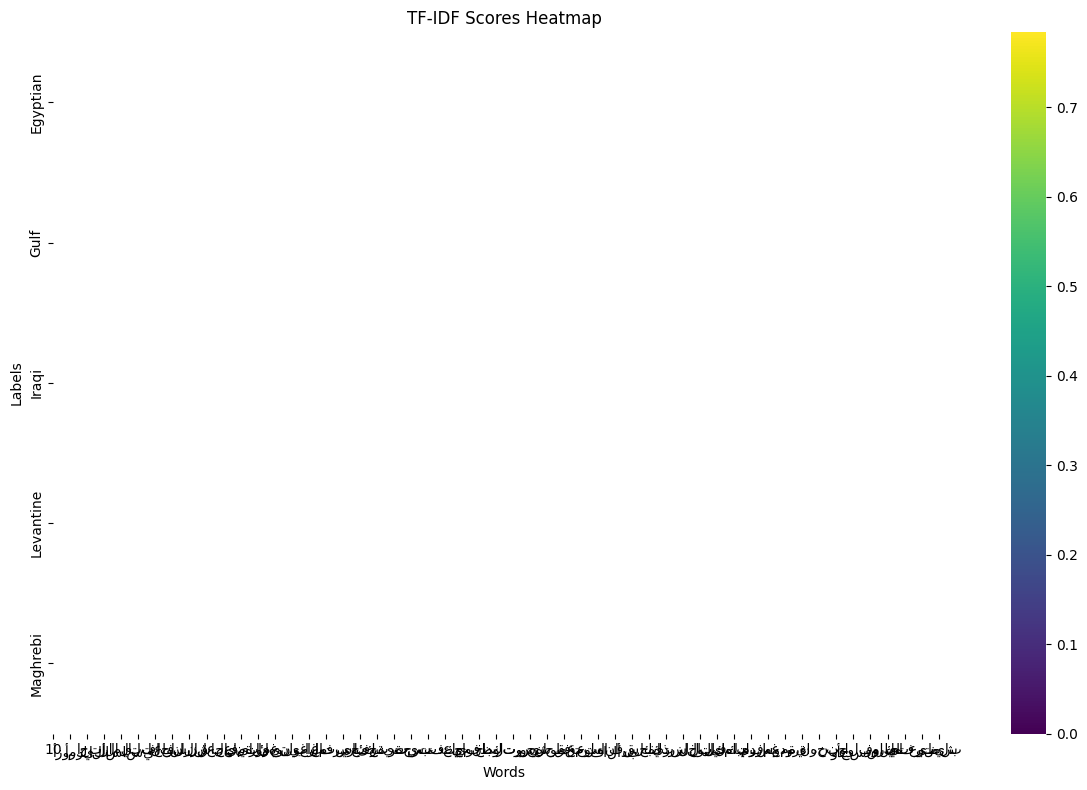

In [20]:
# Group texts by their label for word frequency analysis
data_by_label = data.groupby('label')['Text'].apply(lambda x: " ".join(x)).to_dict()

# Word frequency by label (improved word splitting for Arabic)
word_counts = {label: Counter(word_tokenize(text)) for label, text in data_by_label.items()}
word_count_df = pd.DataFrame(word_counts).fillna(0)
display(word_count_df)

# Visualization of word frequency (bar plots for each label)
for label in word_count_df.columns:
    plt.figure(figsize=(10, 6))
    top_words = word_count_df[label].nlargest(10)
    plt.bar(top_words.index, top_words.values)
    plt.title(f'Top Words for Label {label}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0, ha='center', fontsize=12)  # Adjusted rotation to 0 and centered for better readability
    plt.tight_layout()
    plt.show()

# TF-IDF analysis for vocabulary uniqueness (with improved tokenizer)
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\b[\w؀-ۿ]{2,}\b')  # Exclude single characters to avoid letters, include Arabic characters
texts_by_label = list(data_by_label.values())

# Fit and transform the TF-IDF model
tfidf_matrix = vectorizer.fit_transform(texts_by_label)

# Create a DataFrame for TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=data_by_label.keys(), columns=vectorizer.get_feature_names_out())
display(tfidf_df)

# Visualization of TF-IDF results (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df, cmap='viridis', linewidths=0.5)
plt.title('TF-IDF Scores Heatmap')
plt.xlabel('Words')
plt.ylabel('Labels')
plt.xticks(rotation=0, ha='center', fontsize=10)  # Adjusted font size and rotation for better readability
plt.tight_layout()
plt.show()


In [23]:
# Load embedding model
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Function to get embeddings
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Compute embeddings and group by label
embeddings = {label: [get_embedding(text) for text in data[data['label'] == label]['Text']] for label in data['label'].unique()}

# Calculate average similarity within each label
for label, emb_list in embeddings.items():
    similarities = cosine_similarity(emb_list)
    avg_similarity = np.mean(similarities)
    print(f"Average cosine similarity within {label}: {avg_similarity:.4f}")


Average cosine similarity within Levantine: 0.6155
Average cosine similarity within Iraqi: 0.6149
Average cosine similarity within Gulf: 0.6148
Average cosine similarity within Egyptian: 0.6184
Average cosine similarity within Maghrebi: 0.6315


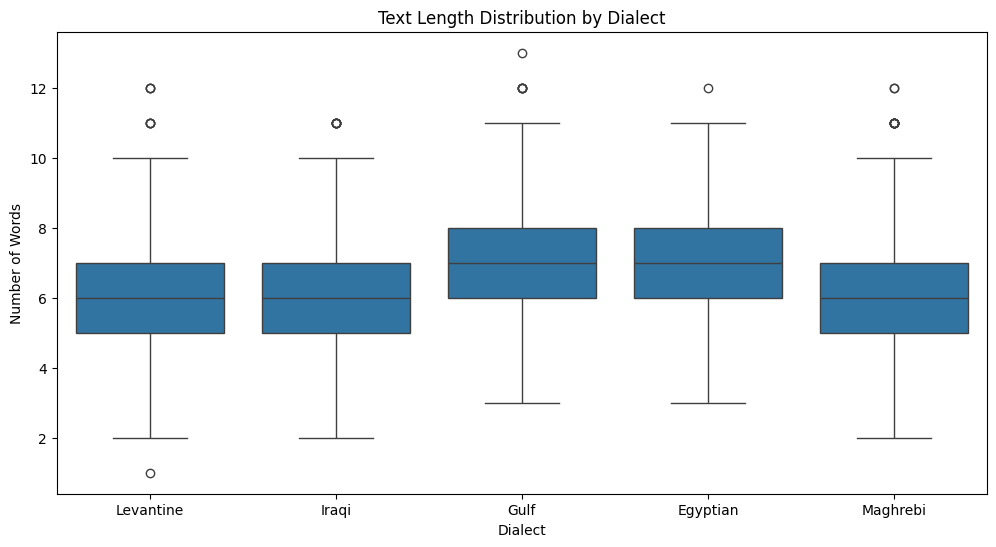

In [ ]:
# Assuming 'data' is your DataFrame with 'text' and 'label' columns
data['text_length'] = data['Text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='text_length', data=data)
plt.title('Text Length Distribution by Dialect')
plt.xlabel('Dialect')
plt.ylabel('Number of Words')
plt.show()


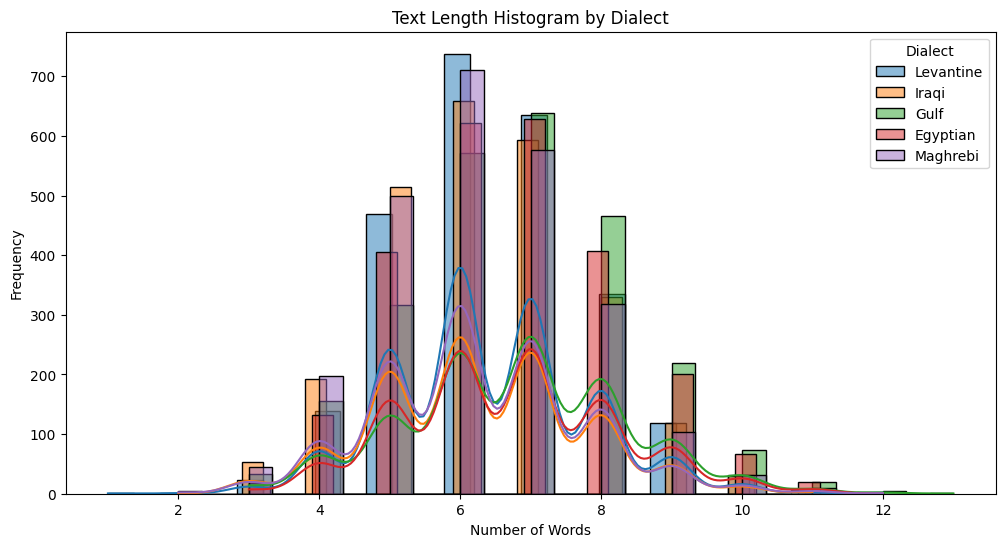

In [25]:
plt.figure(figsize=(12, 6))
for label in data['label'].unique():
    subset = data[data['label'] == label]
    sns.histplot(subset['text_length'], kde=True, label=label, bins=30, alpha=0.5)
plt.title('Text Length Histogram by Dialect')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend(title='Dialect')
plt.show()


In [26]:
from collections import Counter

def unique_word_count(texts):
    all_words = ' '.join(texts).split()
    return len(set(all_words))

unique_words = data.groupby('label')['Text'].apply(unique_word_count)
print(unique_words)


label
Egyptian     7206
Gulf         7857
Iraqi        8162
Levantine    7938
Maghrebi     8427
Name: Text, dtype: int64


In [30]:
# Assuming `llm_data` is your DataFrame and it has a column named 'Text'

# Function to count unique words across the entire dataset
def calculate_unique_words(data):
    all_words = ' '.join(data['Text']).split()  # Combine all sentences and split into words
    unique_words = set(all_words)  # Get unique words
    return len(unique_words)

# Calculate unique words in the LLM-generated dataset
total_unique_words = calculate_unique_words(llm_data)
print(f"Total unique words in LLM-generated data: {total_unique_words}")


Total unique words in LLM-generated data: 27582


In [ ]:
from scipy.stats import f_oneway

groups = [group['text_length'].values for name, group in data.groupby('label')]
f_stat, p_val = f_oneway(*groups)
print(f'ANOVA F-statistic: {f_stat}, p-value: {p_val}')


ANOVA F-statistic: 63.50890459953114, p-value: 3.081331912111818e-53
